In [2]:
#q1
import geopandas as gpd
county_df = gpd.read_file('counties.geojson')
len(county_df)

72

<AxesSubplot:>

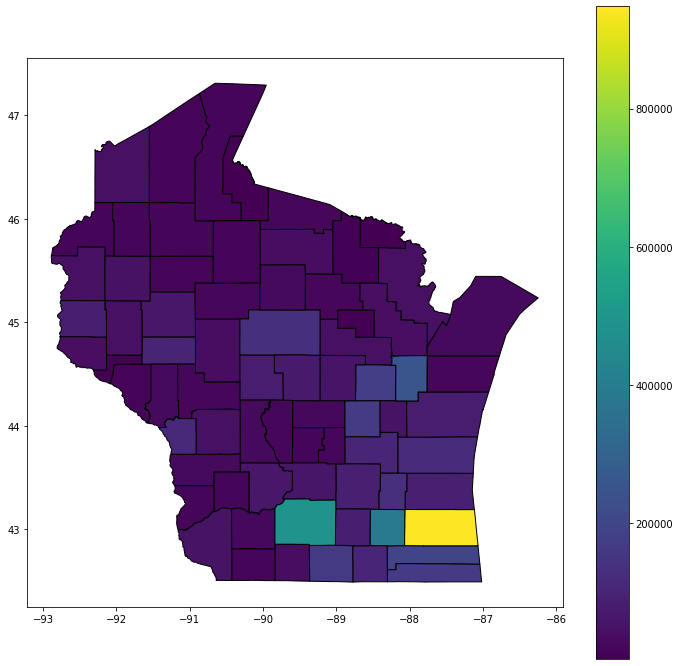

In [3]:
#q2
county_df.plot(figsize=(12,12), edgecolor="k", legend=True, column="POP100")

In [4]:
# add 'AREALAND' col
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

conn = sqlite3.connect('counties_tracts.db')
county_db = pd.read_sql("""SELECT * FROM counties""", conn)
county_df = pd.merge(county_df,county_db,on='NAME', how='left')
    
# create train and test datasets
train, test = train_test_split(county_df, random_state=320, test_size=0.25)

In [5]:
#q3
test['NAME'].tolist()

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [6]:
#q4
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [7]:
#q5
pred_df = pd.DataFrame({"AREALAND":[1295000000]})

pred_df["POP100"] = model.predict(pred_df)
pred_df["POP100"].to_list()[0]

82032.53073541154

In [8]:
# load 'tracts' table
tract_db = pd.read_sql("SELECT COUNTY, SUM(HU100) AS HU100 FROM tracts GROUP BY COUNTY", conn)

county_df = pd.merge(county_df,tract_db[["COUNTY", "HU100"]],on='COUNTY', how='left')

# compute sum of 'HU100' per 'COUNTY'
county_df.groupby(['COUNTY'])["HU100"].transform('sum')

# create train and test datasets
train, test = train_test_split(county_df, random_state=320, test_size=0.25)

In [9]:
#q6
test['NAME'].tolist()

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [10]:
#q7
train.set_index('NAME')["HU100"].T.to_dict()

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [11]:
#q8
scores = cross_val_score(LinearRegression(), train[["HU100"]], train["POP100"])
scores.mean()

0.9652534544116037

In [12]:
#q9
scores.std()

0.03704265206670459

In [13]:
#q10
import math
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
model.score(test[["HU100"]], test["POP100"])

str("POP100 = %s*HU100 + %s"%(round(model.coef_[0], 2),round(model.intercept_, 2)))

'POP100 = 2.39*HU100 + -7910.46'

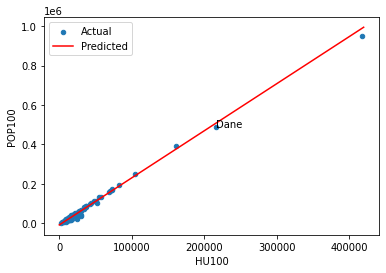

In [14]:
#q11
def is_Dane(x):
    if "".join([x[2]]) == "Dane County":        
        ax.text(x[0], x[1], "Dane")

ax = county_df.plot.scatter("HU100","POP100", label='Actual')
predict_df = pd.DataFrame({"HU100": range(1, 420000)})
predict_df["Predicted"] = model.predict(predict_df)
predict_df.plot.line("HU100","Predicted",color="red", ax=ax, label="Predicted")
txt_series = county_df[['HU100','POP100','NAME']].apply(lambda x: is_Dane(x),axis=1)

In [15]:
#q12
import numpy as np
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

#np.where(((A > 2) & (A < 5)), 1, 0).sum()
((A >= 2) & (A <= 5)).astype(int).sum()

12

In [16]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

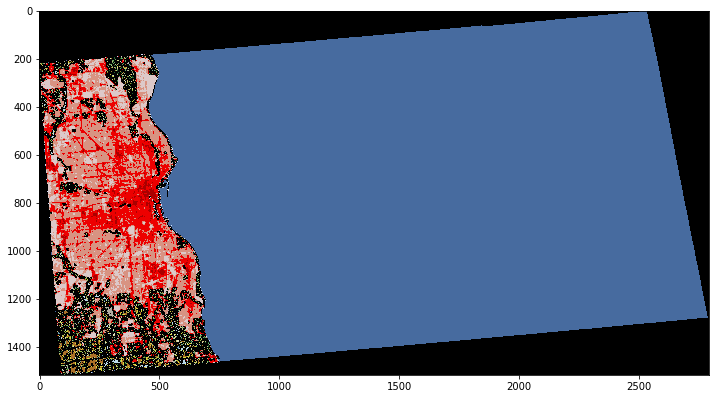

In [17]:
#q13
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask

land = rasterio.open("zip://../p6/land.zip!wi.tif")

milwaukee = county_df[county_df["NAME"]=="Milwaukee County"]

matrix, _ = mask(land, milwaukee.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [18]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [19]:
#q14
len(matrix[matrix==11]) / len(matrix[matrix != 0])

0.7963037455950543

Text(0.5, 0, 'Pasture Cells in County')

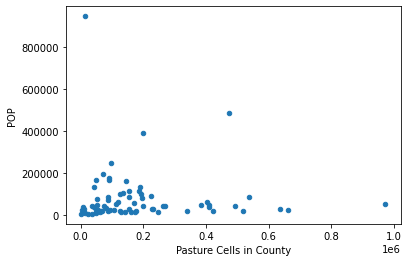

In [20]:
#q15
my_dict = {"NAME": [], "PASTURE" :[], "POP" : []}
for name in county_df["NAME"].to_list():
    county = county_df[county_df["NAME"]==name]
    matrix, _ = mask(land, county.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    my_dict['NAME'].append(name)
    my_dict['PASTURE'].append(len(matrix[matrix==81]))
    my_dict['POP'].append(county["POP100"].to_list()[0])
    
my_df = pd.DataFrame.from_dict(my_dict)
ax = my_df.plot.scatter("PASTURE","POP")
ax.set_xlabel('Pasture Cells in County')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# pick 'developed_med' and 'developed_high' from land.zip
tracts_df = gpd.read_file('tracts.geojson')
my_dict= {"GEOID": [], "POP100" : [], "DEV_M": [], "DEV_H": [], "geometry" : []}

for gid in tracts_df["GEOID"].to_list():
    geo = tracts_df[tracts_df["GEOID"]==gid]
    matrix, _ = mask(land, geo.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    my_dict['GEOID'].append(gid)
    my_dict['POP100'].append(geo["POP100"].to_list()[0])    
    my_dict['DEV_M'].append(len(matrix[matrix==23])) # developed_med
    my_dict['DEV_H'].append(len(matrix[matrix==24])) # developed_high
    my_dict['geometry'].append(geo["geometry"].to_list()[0])
    
my_df = pd.DataFrame.from_dict(my_dict)

Text(0, 0.5, 'R^2 Score')

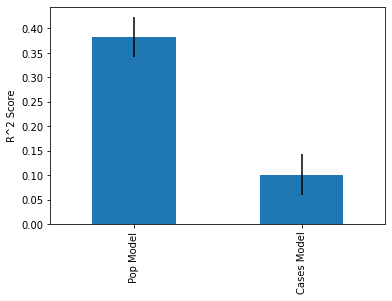

In [22]:
#q16
# create train and test datasets
train, test = train_test_split(my_df, random_state=320)

# create regression models
m1 = LinearRegression()
m2 = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression()),
])

scores1 = cross_val_score(m1, train[["DEV_M"]], train["POP100"])
scores2 = cross_val_score(m2, train[["DEV_H"]], train["POP100"])

avg = pd.Series({"Pop Model": scores1.mean(), "Cases Model": scores2.mean()})
std = pd.Series({"Pop Model": scores1.std(), "Cases Model": scores2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [23]:
print('Variance Check:')
print('m1:', scores1.std())
print('m2:', scores2.std())

# m1: explained variance
m1.fit(train[["DEV_M"]], train["POP100"])
m1.score(test[["DEV_M"]], test["POP100"])

before_variance = my_df["POP100"].var()
after_variance = (my_df["POP100"] - m1.predict(my_df[["DEV_M"]])).var()

improvement = before_variance - after_variance
m1_ev = improvement / before_variance

print()
print('*'*50)
print()

# m2: explained variance
m2.fit(train[["DEV_H"]], train["POP100"])
m2.score(test[["DEV_H"]], test["POP100"])

before_variance = my_df["POP100"].var()
after_variance = (my_df["POP100"] - m2.predict(my_df[["DEV_H"]])).var()

improvement = before_variance - after_variance
m2_ev = improvement / before_variance

print('Explained Variance Check:')
print('m1:', m1_ev)
print('m2:', m2_ev)

Variance Check:
m1: 0.04072716649104287
m2: 0.041631678483812724

**************************************************

Explained Variance Check:
m1: 0.3799624657630713
m2: 0.12275493781056072


In [24]:
#q17
# The model 'm1', which explains 'developed_med', appears to do better job for this prediction task. 
# In the bar plot, m1's score is greater than the other model's, and m1 has lower variance than m2.
# Now, let's explore the two models' explained variance.

# Explained variance is expected to be over at least 0.35 for this problem, and
# the result shows that m1's explained variance is over 0.35, while m2's is not.
# In a nutshell, 'm1' has an higher score, lower variance, and higher explained varince over 'm2'.
# Thus, I'd recommend 'm1' over 'm2' for this prediction task.
m1_ev

0.3799624657630713